<a href="https://colab.research.google.com/github/Carlosrbrj/MarathonML/blob/main/MVP_ML_Carlos_Jr_PUCrio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Aluno:** Carlos Roberto Batista Rocha Júnior

Abril de 2024

#  1. Definição do Problema

Esse projeto visa construir um modelo de aprendizado de máquina supervisionado para prever o tempo de conclusão de uma maratona com base no histórico de treinos dos atletas 4 semanas antes da prova. Para isso, será usado o dataset MarathonData proveniente originalmente do Strava, construído por Andrea Girardi e postado publicamente no Kaggle.
Esse dataset reúne informações de 87 atletas que completaram a maratona de Praga em 2017 com diversos atributos que descrevem desde a performance na prova, extraído a partir dos dados oficiais da direção da maratona, aos dados de treinos extraídos dos Strava, aplicativo que mensura performance de atletas e torna esses dados públicos. Para mais detalhes sobre o dataset, basta acessar: https://www.kaggle.com/datasets/girardi69/marathon-time-predictions


**Informações sobre os atributos**


1.   ID: contagem simples de atletas;
2.    Marathon: refere-se a prova que o atleta participou. Nesse caso, Praga 2017;
3. Name: nome do atleta;
4. Category: são categorias formadas pelo gênero e idade do atleta, sendo assim, temos:

  *   MAM - Homens abaixo de 40 anos,
  *   WAM - Mulheres abaixo de 40 anos
  *   M40 - Homens entre 40 - 45 anos


5. Km4week: refere-se ao número total de kms que o atleta treinou por semana antes da maratona, somada à distância percorrida na prova. Sendo assim, se km4week for igual a 100, então o atleta correu 400 km no total antes da prova;
6. Sp4week: refere-se a velocidade média dos atletas nos treinos nas últimas 4 semanas;
7. Crosstraning: Refere-se aos treinos extras corrida que o atleta fez durante a preparação;
8. Wall21: É o tempo que cada atleta levou para completar a primeira metade da maratona (em decimais);
9. Marathon time: É o tempo final da prova em decimais;
10. Squad: é uma categorização de pelotão com base no resultado final, sendo assim, temos:

  * A Terminou a prova abaixo de 3h
  * B Terminou a prova entre 3h e 3h20m
  * C Terminou a prova entre 3h20m e 3h40m
  * D Terminou a prova entre 3h40 e 4h

## 1.1 Contextualização

Com exposto, o objetivo desse notebook é criar um modelo que busca prever o tempo final de uma maratona, dado os dados de treinos das 4 semanas antes da prova. Como primeiro passo, o notebook no link abaixo feito por mim na sprint de Análise de Dados e Boas Práticas utilizou o mesmo dataset para construir uma análise exploratória e pré-processamento desse dataset. Com ele, foi possível concluir algumas coisas, como:


1.    foi possível observar que existe uma forte correlação negativa entre os atributos km4week e sp4week com o atributo MarathonTime, indicando que os atletas que tiveram um maior volume de treino 4 semanas antes, ou seja, correram por uma maior kilometragem ou que tiveram treinos com maior intesidade (registraram uma maior velocidade média durante os treinos nas semanas antes da prova), tiveram melhores resultados na prova

2.   Os atletas do primeiro pelotão (terminaram a prova abaixo de 3h), são aqueles que também possuem um maior volume de treinos.

Sendo assim, proponho ao final do trabalho três datasets distintos para serem usados nos modelos de ML, sendo o primeiro derivado do processo de limpeza de dados que exclui dados faltantes, o segundo é um dataset que propõe a transformação do atributo CrossTraning em dummy com o objetivo de mensurar o impacto de treinos não tradicionais nos resultados da maratona. Já o terceiro exclui do dataset a o atributo Wall21 devido à alta correlação com o atributo MarathonTime.

## 2. Preparação do Dataset

Essa seção se dedica a preparar os datasets que serão usados para construir o modelo de Machine Learning. Para darmos início, o bloco de código abaixo importa todos os pacotes que irei usar nesse projeto, além de desativar as notificações de "warnings".

In [193]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

## 2.1 - Carga de dados

Para carregar o dataset original disponível online em um repositório do Github, usaremos o pacote Pandas.

In [194]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Carlosrbrj/mvpPucmarathon/main/MarathonsData%20-%20MarathonData.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

Apenas para conhecimento e verificação, o bloco de código abaixo imprime algumas características de sua construção como a dimensão, informações e as primeiras 10 linhas.

In [195]:
# Mostra as dimensões do dataset
dataset.shape

# Mostra as informações do dataset
dataset.info()

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         81 non-null     float64
 8   MarathonTime   87 non-null     float64
 9   Squad          87 non-null     object 
dtypes: float64(4), int64(1), object(5)
memory usage: 6.9+ KB


,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,Squad
0,1,Prague17,Blair MORGAN,MAM,132.8,14.43,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.67,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.52,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.26,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.95,NaN,1.36,2.74,A
5,6,Prague17,David Pecina,M40,42.2,13.61,NaN,1.32,2.78,A
6,7,Prague17,Tomas Drabek,M40,89.0,12.59,NaN,1.38,2.81,A
7,8,Prague17,Jan Rada,M45,106.0,12.69,NaN,1.41,2.84,A
8,9,Prague17,Tomas Drabek,MAM,70.0,13.77,ciclista,1.38,2.83,A
9,10,Prague17,martin ?indel ?,M45,84.2,13.37,NaN,1.35,2.86,A


## 2.2 - Construção dos Datasets

Nessa etapa do Notebook, irei construir os três dataset propostos no primeiro trabalho. Com isso, a estruturei da seguinte forma:

1.   Dataset sem Missing (MarathonSM)
2.   Dataset sem Wall21 (Marathon21)
3.   Dataset com transformações categoricas (MarathonD).


### 2.2.1 - Dataset sem Missing (MarathonSM)

O código abaixo verifica a nulidade do dataset original. Como poderemos observar, existem 6 valores faltantes no atributo Category, que se refere a idade e gênero e 6 valores missings no atributo Wall21.

In [196]:
# verificando nulls no dataset
dataset.isnull().sum()

id                0
Marathon          0
Name              0
Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
Squad             0
dtype: int64

Com isso, o código abaixo cria o novo dataset para resguardar o original. Além disso, excluímos desse dataset pra simplificar o modelo, o código abaixo exclui do novo dataset, os atributos ID, Marathon, Name, Category, CrossTraining e Squad. Para substituir os dados faltantes em Wall21, usamos a mediana desse atributo.

In [197]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas inicialmente
MarathonSM = dataset[col[:]]

# removendo as colunas 'id' , 'Marathon' e 'Name'
MarathonSM.drop(['id', 'Marathon', 'Name', 'Category', 'CrossTraining', 'Squad'], axis=1, inplace= True)

# substituindo os NaN de 'Wall21' pela mediana da coluna
MarathonSM['Wall21'].fillna(MarathonSM['Wall21'].median(), inplace=True)


A partir do novo dataser, o código abaixo imprime a matriz de correlação usando a biblioteca Seaborn. Sendo asim, será possível identificar que existe uma correlação positiva muito forte com a variável Wall21 e correlações negativas com os atributos KM4week e SP4week, comno era esperado.

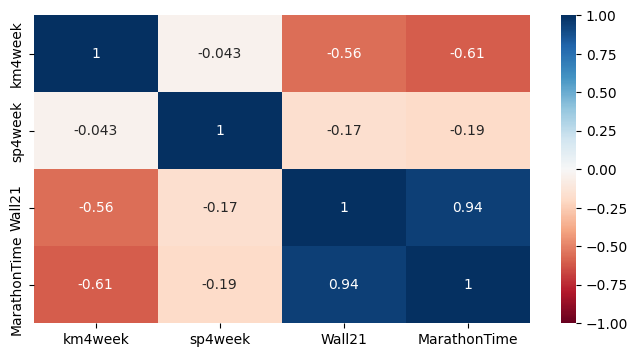

In [198]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(MarathonSM.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

### 2.2.2 - Dataset sem Wall21 (Marathon21)

O próximo dataset que será construído nesse etapa é o dataset original com o tratamento de Missing como vimos anteriormente, mas sem o atributo Wall21. Essa decisão foi feita devido ao alto grau de correlação entre esse atributo e a variável target, MarathonTime.

O código abaixo prepara esse novo dataset e exibe a nova matriz de correlação.

In [199]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(MarathonSM.columns)

# o novo dataset irá conter todas as colunas incialmente
Marathon21 = MarathonSM[col[:]]

# removendo o atributo Wall21
Marathon21.drop(['Wall21'], axis=1, inplace= True)

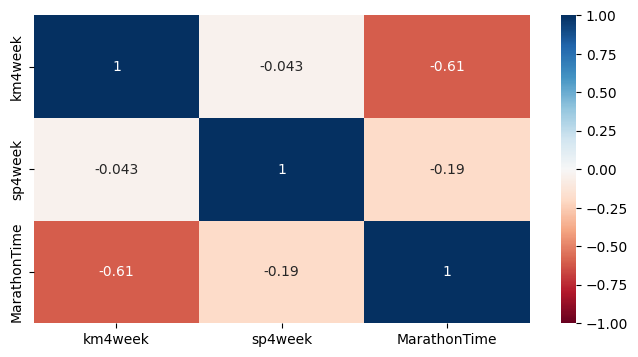

In [200]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (8,4))
sns.heatmap(Marathon21.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

### 2.2.3 - Dataset com transformações categoricas (MarathonD)

O terceiro dataset proposto é construído a partir do tratamento do dataset original com a exclusão dos atributos: Wall21, ID, Name, Marathon, Squad e Category. Além disso, iremos propor uma transformação categórica do atributo CrossTraning.
O código abaixo cria o novo dataset que iremos usar nessa transformação.

In [201]:
# Criando novo dataset para tratamento de missings com todas as colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas inicialmente
MarathonD = dataset[col[:]]

# removendo os atributos citados
MarathonD.drop(['id', 'Marathon', 'Name', 'Category', 'Wall21', 'Squad'], axis=1, inplace= True)

# exibindo as primeiras linhas
MarathonD.head()

,km4week,sp4week,CrossTraining,MarathonTime
0,132.8,14.43,NaN,2.37
1,68.6,13.67,NaN,2.59
2,82.7,13.52,NaN,2.66
3,137.5,12.26,NaN,2.68
4,84.6,13.95,NaN,2.74


Antes de realizar a transformação, vamos verificar a distribuição de CrossTraning, com o objetivo de identificar quantos atletas fazem algum outro tipo de treino durante o cíclo de treinamento e quais são. Aqui, veremos que apenas 13 atletas fazem outros tipos de treinos, sendo todos cliclistas. Além disso, identifcaremos que existem 5 entradas distintas nesse atributo.

In [202]:
# Verifica a distribuição de outros tipos de treinos
dataset.groupby('CrossTraining').size()

CrossTraining
ciclista    13
dtype: int64

Com esse novo dataset, iremos transformar o atributo CrossTraining em Dummy usando a biblioteca do scikit-learn a partir do processo dummy encoding. O código abaixo realiza essa operação.

In [203]:
# definindo o transformador como one hot encoding (com Dummy variable encoder)
encoder = OneHotEncoder(drop= 'first' , sparse=False)

# transformando os dados
dummy = encoder.fit_transform(MarathonD[['CrossTraining']])
print(dummy)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [204]:
#Removendo o atributo CrossTraining
MarathonD.drop(['CrossTraining'], axis=1, inplace= True)

#Transformando o resultado em Dataframe
dummy = pd.DataFrame(dummy)

# Concatenar o resultado com o DataFrame original
MarathonD = pd.concat([MarathonD, dummy], axis=1)

In [205]:
# exibindo as últimas linhas
MarathonD.tail()

,km4week,sp4week,MarathonTime,0
82,50.0,10.83,3.93,1.0
83,33.6,10.13,3.93,0.0
84,55.4,11.04,3.94,1.0
85,33.2,11.07,3.95,1.0
86,17.9,10.85,3.98,0.0


# 3. Modelagem

Nessa seção iremos preparar os datasets criados, dividindo-os entre base de teste e treino. Além disso, também iremos definir o melhor algoritmo para esse problema de regressão para cada dataset.
Sendo assim, essa etapa será dividida em 3, uma para cada dataset:


1. Dataset sem Missing (MarathonSM)
2. Dataset sem Wall21 (Marathon21)
3. Dataset com transformações categoricas (MarathonD)



## Dataset sem Missing (MarathonSM)

Vamos iniciar essa etapa do notebook fazendo a divisão do dataset sem missings em base de teste e treino. No entanto, antes de tudo, a primeira linha de código exibe as primeiras linhas desse dataset.

O código abaixo, portanto, separa o dataset em treino e teste usando a técnica de holdout em que 20% do dataset é separado para teste e 80% será usado para treino. Além disso, definimos os parêmtros de validação cruzada (acurácia) em 10 folds.

In [206]:
# Mostra as primeiras linhas do dataset
MarathonSM.head()

,km4week,sp4week,Wall21,MarathonTime
0,132.8,14.43,1.16,2.37
1,68.6,13.67,1.23,2.59
2,82.7,13.52,1.30,2.66
3,137.5,12.26,1.32,2.68
4,84.6,13.95,1.36,2.74


In [207]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = MarathonSM.values
X = array[:,0:3] # atributos
y = array[:,3] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

### 3.1.1 - Modelagem e Inferência

Nessa etapa, iremos iniciar o processo de construção do modelo de previsão para esse dataset.

O bloco de código abaixo cria todos os modelos que serão avaliados nesse primeiro momento e os separam em uma lista em que será avaliada a acurácia de cada um. Por fim, o resultado é exibido em um gráfico Boxplot que ajuda a identificar qual é o melhor modelo até aqui.


LR: MSE 0.02 (0.02) - RMSE 0.14
Ridge: MSE 0.05 (0.07) - RMSE 0.22
Lasso: MSE 0.09 (0.04) - RMSE 0.30
KNN: MSE 0.09 (0.04) - RMSE 0.30
CART: MSE 0.04 (0.02) - RMSE 0.20
SVM: MSE 0.09 (0.04) - RMSE 0.30


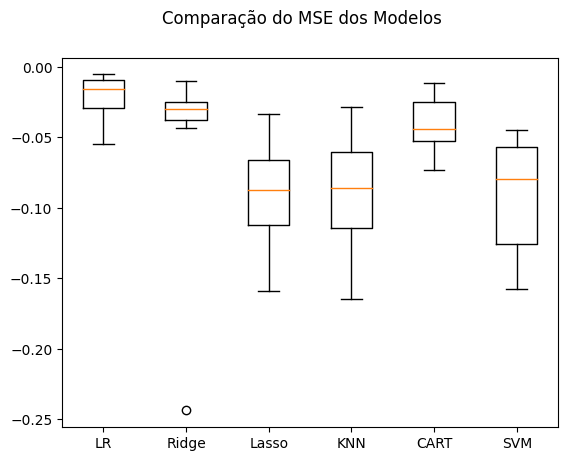

In [208]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Primeiras Conclusões**

De forma geral, o modelo que apresenta melhor resultado é aquele que gera o menor MSE e, consequentemente, o menor RMSE. Logo, podemos concluir que o melhor modelo aqui apresentado é o de Regressão Linear.
O código abaixo cria o modelo usando esse algoritmo e todo conjunto de treino disponível. Além disso, exibe o MSE e RMSE encontrado nos resultados.

In [209]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.01
RMSE 0.09


Portanto, podemos concluir que, para o dataset MarathonSM, o algoritmo que teve a melhor performance foi o de regressão linear.

Por fim, os resultados do erro do modelo de teste indicam que não houve problema de overfitting no modelo e isso pode ser explicado pelo fato de termos usado o método de validação cruzada para dividir a base em teste e treino.

## Dataset sem Wall21 (Marathon21)

Da mesma forma como fizemos para o Dataset sem Missing, nessa etapa iremos preparar o dataset sem o atributo 'Wall21', dividindo-o em teste e treino, além de avaliar o melhor algoritmo de previsão para esse Dataset.

Sendo assim, a primeira linha de código exibe as primeiras linhas desse dataset.

Já o bloco de código abaixo separa o dataset em treino e teste usando a técnica de holdout em que 20% do dataset é separado para teste e 80% será usado para treino. Além disso, definimos os parêmtros de validação cruzada (acurácia) em 10 folds.

In [210]:
# Mostra as primeiras linhas do dataset
Marathon21.head()

,km4week,sp4week,MarathonTime
0,132.8,14.43,2.37
1,68.6,13.67,2.59
2,82.7,13.52,2.66
3,137.5,12.26,2.68
4,84.6,13.95,2.74


In [211]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = Marathon21.values
X2 = array[:,0:2] # atributos
y2 = array[:,2] # classe (target)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

### 3.1.2 Modelagem e Inferência

Como feito para o outro dataset, o bloco de código abaixo cria todos os modelos que serão avaliados por sua acurácia.

LR: MSE 0.16 (0.22) - RMSE 0.39
Lasso: MSE 0.09 (0.04) - RMSE 0.30
KNN: MSE 0.09 (0.04) - RMSE 0.30
CART: MSE 0.09 (0.05) - RMSE 0.30
SVM: MSE 0.09 (0.04) - RMSE 0.31


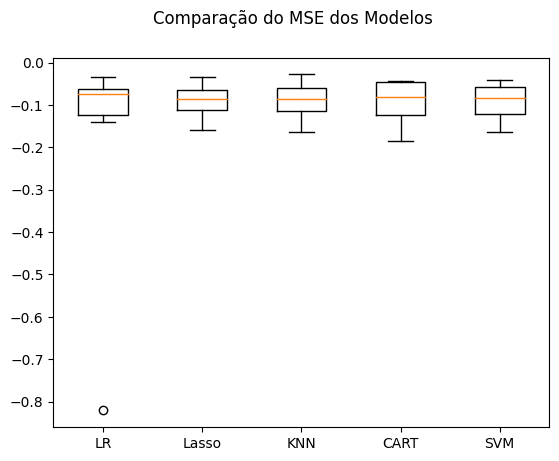

In [212]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X2_train, y2_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Assim como foi observado no modelo com o Dataset Sem Missings, o algoritmo que apresenta melhor resultado é o de Regressão Linear. O código abaixo cria o modelo usando esse algoritmo e todo conjunto de treino disponível. Além disso, exibe o MSE e RMSE encontrado nos resultados.

In [213]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X2_train, y2_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X2_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y2_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.08
RMSE 0.29


Com esse resultado, podemos observar que a exclusão do atributo Wall21 gerou melhores resultados de previsão quando olhamos para o MSE e RMSE.
Além disso, podemos concluir que para o Dataset

##  Dataset com transformações categóricas (MarathonD)

Por fim, reproduziremos as mesmas análises feitas para o dataset com transformações categóricas.
Sendo assim, a primeira linha de código exibe as primeiras linhas desse dataset.

Já o bloco de código abaixo separa o dataset em treino e teste usando a técnica de holdout em que 20% do dataset é separado para teste e 80% será usado para treino. Além disso, definimos os parêmtros de validação cruzada (acurácia) em 10 folds.

In [214]:
# Mostra as primeiras linhas do dataset
MarathonD.head()

,km4week,sp4week,MarathonTime,0
0,132.8,14.43,2.37,1.0
1,68.6,13.67,2.59,1.0
2,82.7,13.52,2.66,1.0
3,137.5,12.26,2.68,1.0
4,84.6,13.95,2.74,1.0


In [215]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = MarathonD.values
X3 = array[:,0:2] # atributos
y3 = array[:,2] # classe (target)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

### 3.1.3 - Modelagem e inferência

Da mesma fomra, o bloco de código abaixo cria todos os modelos que serão avaliados por sua acurácia.

LR: MSE 0.16 (0.22) - RMSE 0.39
Lasso: MSE 0.09 (0.04) - RMSE 0.30
KNN: MSE 0.09 (0.04) - RMSE 0.30
CART: MSE 0.09 (0.05) - RMSE 0.30
SVM: MSE 0.09 (0.04) - RMSE 0.31


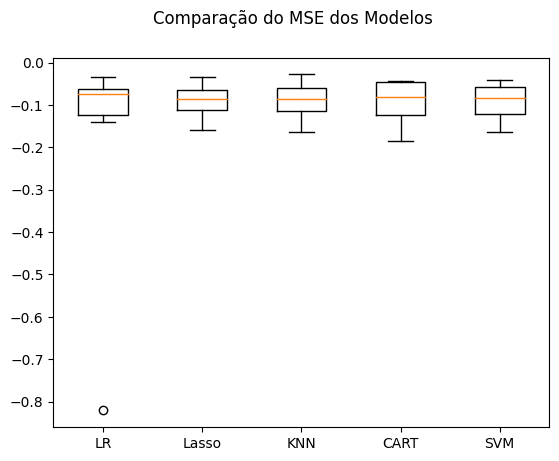

In [216]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X3_train, y3_train, cv=kfold, scoring='neg_mean_squared_error', error_score='raise')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com isso, podemos observar que um dos algoritmos que possui melhor resultado pode ser o SVM, já que esse apresentou um dos menores valores de MSE e RMSE.

O código abaixo cria o modelo usando esse algoritmo e todo conjunto de treino disponível. Além disso, exibe o MSE e RMSE encontrado nos resultados.

In [217]:
# Criando um modelo com todo o conjunto de treino
model = SVR()
model.fit(X3_train, y3_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X3_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y3_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 0.09
RMSE 0.29


# 4. Conclusão

Nesse projeto, o meu objetivo foi construir um modelo de aprendizado de máquina supervisionado que fosse capaz de prever o tempo de conclusão de uma maratona com base no histórico de treinos dos atletas até 4 semana antes da prova.
Podemos observar, a partir da tabela abaixo, o resumo dos principais resultados encontrados nesse Notebook.


| Dataset    | Algoritmo |   MSE    |
|----------  |---------- |----------|
| MarathonSM | Regressão Linear    | 0.01   |
| Marathon21 | Regressão Linear    | 0.08   |
| MarathonD  | SVM    | 0.09   |


Com isso, pode-se concluir que o modelo de ML que apresenta melhores resultados é o que utiliza o dataset completo com tratamento de missing e o algoritmo de regressão linear para prever o tempo de conclusão de uma maratona com base nos dados de treinos e o tempo de conclusão da metade da prova (Wall21).
Além disso, esse modelo indica não ter problemas de overfitting, uma vez que o erro da base de teste foi menor quando comparado a base de treino, além de termos usado o método de validação cruzada para separar a base em treino e teste.

Por fim, próximas evoluções desse trabalho podem levar em consideração outros modelos de previsão mais robustos, bem como avalisar a performance do modelo escolhido quando existirem transformações de normalização e padronização dos dados de entrada.